# Task 2

Perform hyper-parameter tuning on the DecisionTree algorithm in order to predict the target column "pulse" for the status of each horse in the dataset. Use 7-fold cross-validation for the hyper-parameter tuning, tune the parameters "max_features", "max_depth", and "min_samples_split". Provide at least 3 values for each parameter.

## Dataset description

### Features

* id - horse identifier
* surgery - was the horse in surgery (0 - no, 1 - yes)
* age - if the horse is young or old (0 - old, 1 - young)
* hospital_number - the identifier of the hospital the horse was treated in
* rectal_temp - the horse's rectal temperature
* respiratory_rate - the horse's respiratory rate
* temp_of_extremities - the horse's temperature of the extremities (represented as categories ordered by intensity)
* nasogastric_reflux_ph - ph value of the horse's nasogastric reflux
* packed_cell_volume - volume of horse's packed cell
* total_protein - horse's total protein value
* abdomo_protein - horse's abdominal protein value
* surgical_lesion - whether the horse has a surgical lesion or not
* lesion_1 - size of the lesion (0 if the horse doesn't have one)
* cp_data - binary variable

### Target variable
* pulse - the horse's pulse

### Download the dataset

In [25]:
! gdown 1-6y_xGi204yBOq8q_4-i1J-afXxVBHKB

Downloading...
From: https://drive.google.com/uc?id=1-6y_xGi204yBOq8q_4-i1J-afXxVBHKB
To: /content/data_g2.csv
100% 72.4k/72.4k [00:00<00:00, 66.2MB/s]


### Read the dataset

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [27]:
data = pd.read_csv("/content/data_g2.csv")
data

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,cp_data
0,0,1,0,530001,38.1,132.0,24.0,2,6.5,57.0,8.5,3.4,1,2209,0
1,1,1,0,533836,37.5,88.0,12.0,2,2.0,33.0,64.0,2.0,1,2208,0
2,2,1,0,529812,38.3,120.0,28.0,2,3.5,37.0,6.4,3.4,1,5124,0
3,3,1,0,5262541,37.1,72.0,30.0,1,2.0,53.0,7.0,3.9,1,2208,1
4,4,0,0,5299629,38.0,52.0,48.0,3,7.0,47.0,7.3,2.6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,1,0,535246,38.5,129.0,48.0,2,2.0,57.0,66.0,2.0,1,2206,0
1231,1231,1,0,528570,37.5,60.0,50.0,2,3.0,35.0,6.4,3.6,1,2209,1
1232,1232,1,1,529685,37.5,84.0,40.0,3,3.0,40.0,5.9,7.0,1,400,1
1233,1233,1,0,534784,38.1,70.0,16.0,3,2.0,58.0,74.0,2.0,1,2209,0


### Check if dataset is balanced, or if not applicable give your reasons why



In [28]:
data.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
cp_data                  0
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   int64  
 2   age                    1235 non-null   int64  
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   int64  
 8   nasogastric_reflux_ph  1235 non-null   float64
 9   packed_cell_volume     1235 non-null   float64
 10  total_protein          1235 non-null   float64
 11  abdomo_protein         1235 non-null   float64
 12  surgical_lesion        1235 non-null   int64  
 13  lesion_1               1235 non-null   int64  
 14  cp_data                1235 non-null   int64  
dtypes: f

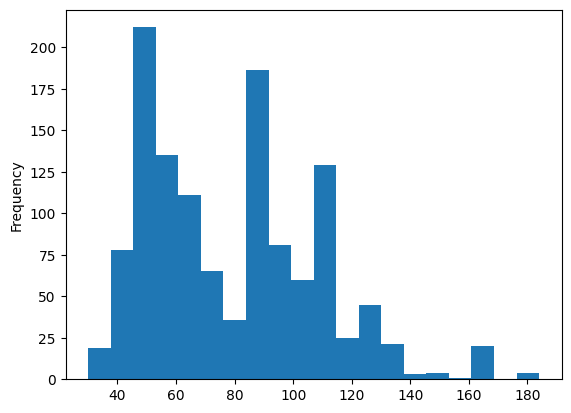

In [30]:
data['pulse'].plot.hist(bins=20)
plt.show()

### Perform all necessary transformations of the data

In [31]:
data = data.drop(columns='id')

In [32]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,cp_data
0,1,0,530001,38.1,132.0,24.0,2,6.5,57.0,8.5,3.4,1,2209,0
1,1,0,533836,37.5,88.0,12.0,2,2.0,33.0,64.0,2.0,1,2208,0
2,1,0,529812,38.3,120.0,28.0,2,3.5,37.0,6.4,3.4,1,5124,0
3,1,0,5262541,37.1,72.0,30.0,1,2.0,53.0,7.0,3.9,1,2208,1
4,0,0,5299629,38.0,52.0,48.0,3,7.0,47.0,7.3,2.6,0,0,1


In [33]:
data['age'].value_counts()

0    1160
1      75
Name: age, dtype: int64

In [34]:
X, Y = data.drop(columns=['pulse'], axis=1), data['pulse']

### Hyper-parameter tuning and cross-validation

In [35]:
parameters = {
    'max_features': [None, 'auto', 'sqrt'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


In [36]:
cv = KFold(7)

In [37]:
results = []
for max_features in parameters['max_features']:
  for max_depth in parameters['max_depth']:
    for min_samples_split in parameters['min_samples_split']:
      clf = DecisionTreeRegressor(max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split)
      predictions = cross_val_predict(clf, X, Y, cv=cv)
      node = {
          "model": clf,
          "score": mean_squared_error(Y, predictions)
      }
      results.append(node)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [38]:
results.sort(key=lambda x: x['score'], reverse=True)

In [39]:
best_model = results[0]['model']

Choose a metric to optimize, choose hyper parameter values to experiment with, perform 5-fold cross-validation.

### Evaluate the performance of the best model using multiple metrics

In [40]:
predictions = cross_val_predict(best_model, X, Y, cv=cv)

In [43]:
print(mean_squared_error(Y, predictions))

956.0242914979757


In [44]:
print(r2_score(Y, predictions))

-0.12921585727824225


Calculate metrics

Display a confusion matrix if applicable